# Running this notebook
`bazel build lib/Metrics:jupyter && ./bazel-bin/lib/Metrics/jupyter`

# Univariate statistics
## Summary Statistics
### Median
It is a robust approximation of the mean and is independant of any distance metric.
In fact it is the most resistant statistic, as it gives a good approximation as long as 50% of the data is correct.

In [2]:
from lib.Metrics.univariate_metrics import median
import inspect

print(inspect.getsource(median))

def median(data: list):
    assert len(data) > 0, "List is empty"
    if len(data) == 1:
        return data[0]
    
    data = sorted(data)
    mid_index = len(data) // 2
    if len(data) % 2 == 1:
        return data[mid_index]
    else:
        return 0.5 * (data[mid_index - 1] + data[mid_index]) 



## Variability
### Median Absolute Deviation
Source: https://en.wikipedia.org/wiki/Median_absolute_deviation

It is a robust (= works well for a wide range of distributions, including not normal ones) measure of variability.
If we have:
- Elements of the dataset $X_i$
- Whole dataset $X$
We compute it as $$MAD = median(|X_i - median(X)|)$$
In words, it is the median of the absolute deviations from the data's median.

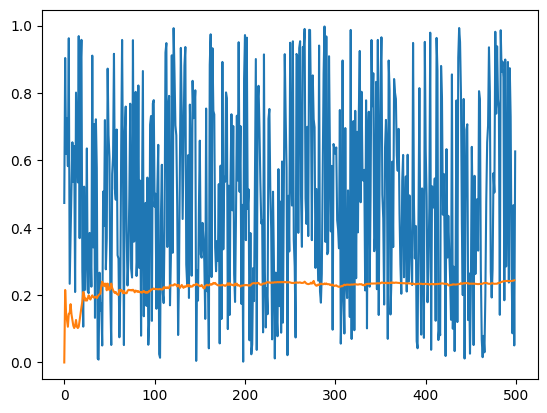

In [27]:
from random import random

def MAD(data: list):
    median_data = median(data)
    residuals_from_median = [abs(x_i - median_data) for x_i in data]
    return median(residuals_from_median)

import matplotlib.pyplot as plt

data = [random() for _ in range(500)]

plt.figure()
plt.plot(data)
plt.plot([MAD(data[:i]) for i in range(1, len(data))])
plt.show()

# Multivariate Statistics
## Summary Statistics
### Geometric Median
See notebook.

## Variability
### Median of Distances to Geometric Median (MADGM)
It is the generalization of the MAD.